In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [20]:
df = pd.read_csv("../input/craigslist-carstrucks-data/vehicles.csv")

In [21]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [22]:
df.shape

(423857, 25)

In [23]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [24]:
df.nunique(axis=0)

id              423857
url             423857
region             404
region_url         413
price            16305
year               111
manufacturer        43
model            27042
condition            6
cylinders            8
fuel                 5
odometer         89554
title_status         6
transmission         3
vin             103588
drive                3
size                 4
type                13
paint_color         12
image_url       222413
description     275765
county               0
state               51
lat              41175
long             41492
dtype: int64

In [25]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, '.2f')))

,id,price,year,odometer,county,lat,long
count,423857.00,423857.00,328743.00,270585.00,0.00,324404.00,324404.00
mean,7190602108.85,57794.37,2009.83,99425.78,nan,38.73,-93.95
std,5159268.78,10025805.12,10.14,120483.31,nan,5.90,17.93
min,7178301636.00,0.00,1900.00,0.00,nan,-80.39,-161.39
25%,7186687550.00,4499.00,2007.00,44324.00,nan,35.05,-106.68
50%,7192067820.00,9995.00,2012.00,91749.00,nan,39.37,-88.01
75%,7194909078.00,18995.00,2016.00,137237.00,nan,42.52,-80.83
max,7197006076.00,3808256046.00,2021.00,10000000.00,nan,80.38,115.52


Cleaning the Data

In [26]:
df['condition'].unique()

array(['excellent', 'good', 'fair', nan, 'like new', 'salvage', 'new'],
      dtype=object)

In [27]:
# Convert the fair and good to good
# excellent and like new to new

def convert_condition(x):
    
    if x in ['good','fair']:
        return 'good'
    if x in ['like new','excellent']:
        return 'excellent'
    return x

df['condition'] = df['condition'].apply(convert_condition)

In [28]:
df['condition'].unique()

array(['excellent', 'good', nan, 'salvage', 'new'], dtype=object)

In [29]:
# Remove redundant variables
# url, image_url and city_url

df = df.drop(columns=['id','url','image_url','region_url'],axis=1)

In [30]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,vin,drive,size,type,paint_color,description,county,state,lat,long
0,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,...,1GTEK19T3YE366021,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,...,NaN,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,...,NaN,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,...,NaN,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,...,1GTHK23D57F102022,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [31]:
# Remove too many NULL values, where it is more than 40%
cols_NULL = (df.isnull().sum()/df.shape[0])[df.isnull().sum()/df.shape[0]>.4].index

print(cols_NULL)

df.drop(columns=cols_NULL,axis=1,inplace=True)

Index(['condition', 'cylinders', 'vin', 'drive', 'size', 'type', 'paint_color',
       'county'],
      dtype='object')


In [32]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'description', 'state', 'lat', 'long'],
      dtype='object')

In [33]:
# Removing Outliers
df = df[df['price'].between(999.99,99999)]
df = df[df['year']>1990]
df = df[df['odometer']<899999]

df.describe().apply(lambda s:s.apply(lambda x:format(x,'.2f')))

,price,year,odometer,lat,long
count,235950.00,235950.00,235950.00,234233.00,234233.00
mean,16286.99,2011.59,99819.52,38.98,-93.78
std,12719.93,5.62,66096.82,5.91,18.00
min,1000.00,1991.00,0.00,-80.39,-161.39
25%,6995.00,2008.00,47291.00,35.19,-106.64
50%,12995.00,2013.00,94794.00,39.63,-87.40
75%,21500.00,2016.00,140000.00,42.70,-80.83
max,99999.00,2021.00,895137.00,65.74,94.16


In [35]:
df.dropna(axis=0,inplace=True)

In [36]:
df.shape

(221504, 13)

Relationship between the variables

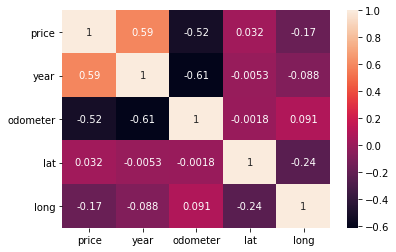

In [39]:
# Correlation Plot
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

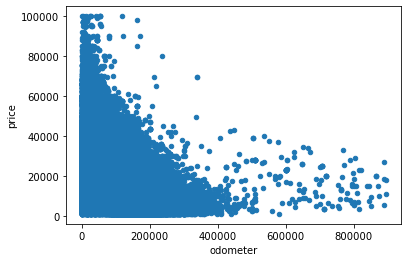

In [41]:
# Scatter Plot
df.plot(kind='scatter',x='odometer',y='price')

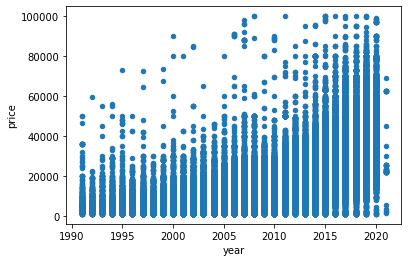

In [42]:
df.plot(kind='scatter',x='year',y='price')

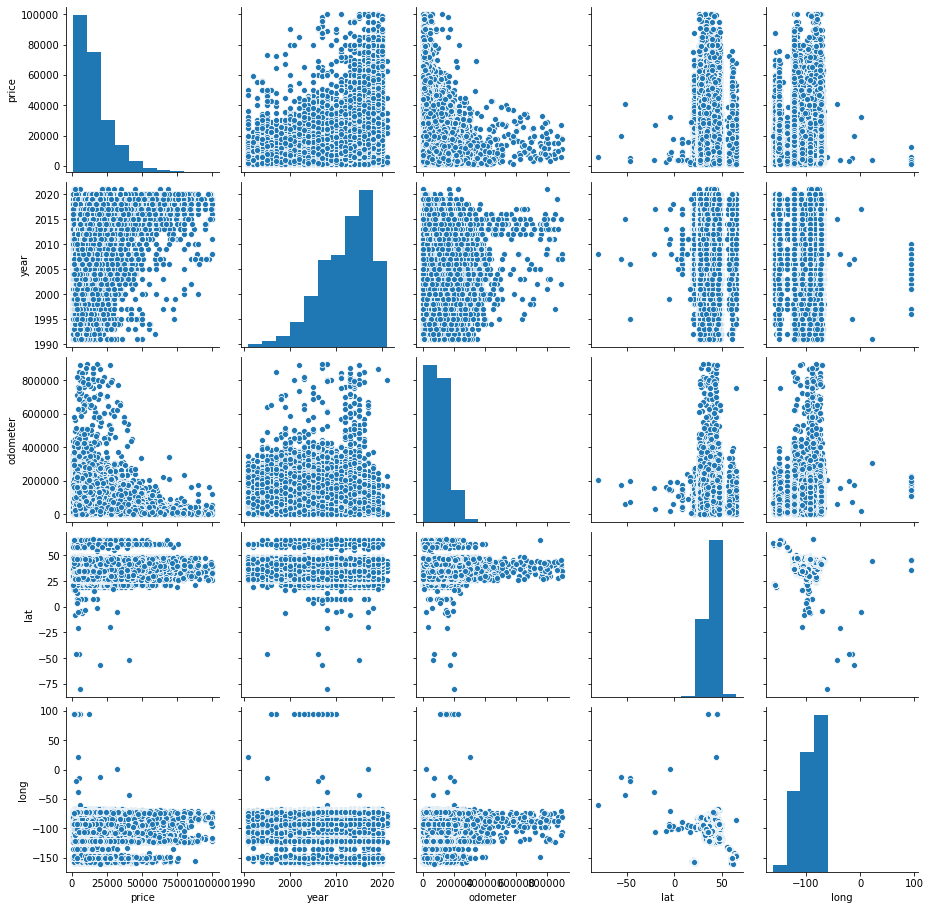

In [43]:
sns.pairplot(df)

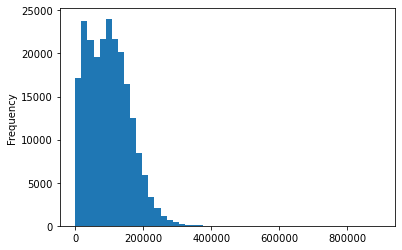

In [45]:
df['odometer'].plot(kind='hist',bins=50)

Odometer tells that it is +ve ly skewed

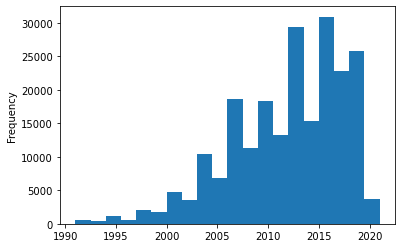

In [46]:
df['year'].plot(kind='hist',bins=20)

Year column is -ve ly skewed

In [47]:
df.boxplot('price')

AttributeError: 'Series' object has no attribute 'boxplot'